In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import warnings
import string
import seaborn as sns
from nltk.stem.porter import * 
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
from nltk import sent_tokenize
from nltk import word_tokenize


import nltk
nltk.download("popular")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [3]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

from nltk.probability import FreqDist

# Data cleaning and preprocessing

## Cleaning Data

In [4]:
# Importing Dataset

data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
data.head(10)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
# Removing Twitter Handles (@username)

data['cleaned_tweet'] = data['tweet'].replace(to_replace="@[\w]*",value='',regex=True)
data.head(10)

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [6]:
# Removing Numbers

data['cleaned_tweet'] = data['cleaned_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
data.head(10)

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so gr


In [7]:
# Removing all special characters

data['cleaned_tweet'] = data['cleaned_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
data.head(10)

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so gr


## Preprocessing Data

In [8]:
# Tokenization

cleaned_text = data['cleaned_tweet']

preprocessed_data = cleaned_text.apply(lambda tweet:word_tokenize(tweet))
preprocessed_data.head(20)

0     [when, a, father, is, dysfunctional, and, is, ...
1     [thanks, for, lyft, credit, i, can, t, use, ca...
2                               [bihday, your, majesty]
3     [model, i, love, u, take, with, u, all, the, t...
4                [factsguide, society, now, motivation]
5     [huge, fan, fare, and, big, talking, before, t...
6                            [camping, tomorrow, danny]
7     [the, next, school, year, is, the, year, for, ...
8     [we, won, love, the, land, allin, cavs, champi...
9                  [welcome, here, i, m, it, s, so, gr]
10    [ireland, consumer, price, index, mom, climbed...
11    [we, are, so, selfish, orlando, standwithorlan...
12    [i, get, to, see, my, daddy, today, days, gett...
13    [cnn, calls, michigan, middle, school, build, ...
14    [no, comment, in, australia, opkillingbay, sea...
15    [ouch, junior, is, angry, got, junior, yugyoem...
16    [i, am, thankful, for, having, a, paner, thank...
17                            [retweet, if, you,

In [9]:
# List of Stopwords

stop_words = set(stopwords.words('english'))
print(stop_words)


{"you'd", 'just', 'have', 'me', 'few', 'yours', 'my', 'whom', 't', 'had', "doesn't", 'through', 'ourselves', "hasn't", 'which', 'm', 'such', 'own', "shouldn't", 'off', 'myself', 'his', 'it', 'are', 'so', 'too', 'don', 'now', 'mustn', "wouldn't", "weren't", 'd', 'mightn', 'why', 'after', 'she', 'itself', 'can', 'themselves', 'ma', 'having', 'ain', 'isn', 'their', 'won', "that'll", 'when', 'your', 'will', 'theirs', 'by', 'being', 'of', 'hers', 'until', 'into', 's', "needn't", 'her', 'is', 'this', 've', 'only', 'any', 'shouldn', 'where', 'about', 'ours', 'an', 'against', 'those', 'hasn', 'from', 'll', 'here', "haven't", "you'll", "it's", 'o', 'nor', 'over', 'very', 'while', 'haven', 'should', "should've", 'i', 'what', 'our', 'at', 'these', 'other', 'most', "isn't", 'yourself', 'as', 'who', 'to', 'aren', "don't", 'but', 'once', 'during', 'same', 'has', 'herself', 'not', "she's", 'him', 'or', 'between', 'each', 'weren', 'were', "didn't", 'some', 'do', 'didn', 'again', 'under', "couldn't", '

In [10]:
# Removing the Stopwords

preprocessed_data_sw = preprocessed_data.apply(lambda x: [word for word in x if not word in stop_words])
preprocessed_data_sw.head(20)


0     [father, dysfunctional, selfish, drags, kids, ...
1     [thanks, lyft, credit, use, cause, offer, whee...
2                                     [bihday, majesty]
3                   [model, love, u, take, u, time, ur]
4                     [factsguide, society, motivation]
5     [huge, fan, fare, big, talking, leave, chaos, ...
6                            [camping, tomorrow, danny]
7     [next, school, year, year, exams, think, schoo...
8     [love, land, allin, cavs, champions, cleveland...
9                                         [welcome, gr]
10    [ireland, consumer, price, index, mom, climbed...
11    [selfish, orlando, standwithorlando, pulseshoo...
12           [get, see, daddy, today, days, gettingfed]
13    [cnn, calls, michigan, middle, school, build, ...
14    [comment, australia, opkillingbay, seashepherd...
15     [ouch, junior, angry, got, junior, yugyoem, omg]
16                [thankful, paner, thankful, positive]
17                                     [retweet,

In [11]:
# Stemming

from nltk.stem import PorterStemmer
stemming = PorterStemmer()

data_stemming = preprocessed_data_sw.apply(lambda token: ' '.join([stemming.stem(i) for i in token]))
data_stemming.head(20)

0         father dysfunct selfish drag kid dysfunct run
1     thank lyft credit use caus offer wheelchair va...
2                                        bihday majesti
3                           model love u take u time ur
4                               factsguid societi motiv
5     huge fan fare big talk leav chao pay disput ge...
6                                   camp tomorrow danni
7     next school year year exam think school exam h...
8     love land allin cav champion cleveland clevela...
9                                             welcom gr
10    ireland consum price index mom climb previou m...
11    selfish orlando standwithorlando pulseshoot or...
12                     get see daddi today day gettingf
13    cnn call michigan middl school build wall chan...
14    comment australia opkillingbay seashepherd hel...
15             ouch junior angri got junior yugyoem omg
16                              thank paner thank posit
17                                         retwe

## PoS Tagging

In [12]:
# Converting string into words for first tweet

nltk_tokens = nltk.word_tokenize(data_stemming[0])
nltk_tokens

['father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', 'run']

In [13]:
for words in nltk_tokens:
    pos_words = nltk.pos_tag(nltk_tokens)
pos_words

[('father', 'RB'),
 ('dysfunct', 'JJ'),
 ('selfish', 'JJ'),
 ('drag', 'NN'),
 ('kid', 'NN'),
 ('dysfunct', 'NN'),
 ('run', 'VB')]

## TFIDF

In [14]:
#coverting the comments into list
comment_list = data_stemming.tolist()
comment_list

['father dysfunct selfish drag kid dysfunct run',
 'thank lyft credit use caus offer wheelchair van pdx disapoint getthank',
 'bihday majesti',
 'model love u take u time ur',
 'factsguid societi motiv',
 'huge fan fare big talk leav chao pay disput get allshowandnogo',
 'camp tomorrow danni',
 'next school year year exam think school exam hate imagin actorslif revolutionschool girl',
 'love land allin cav champion cleveland clevelandcavali',
 'welcom gr',
 'ireland consum price index mom climb previou may blog silver gold forex',
 'selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love',
 'get see daddi today day gettingf',
 'cnn call michigan middl school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin',
 'ouch junior angri got junior yugyoem omg',
 'thank paner thank posit',
 'retweet agre',
 'friday smile around via ig user cooki make peopl',
 'know essenti oil made chemic',
 'eur

In [15]:
# Converting list into array

docs = np.array(comment_list)

In [17]:
import sklearn
import sklearn.ensemble
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(docs)
train_vectors

# printing vectors
print(train_vectors)

  (0, 23481)	0.23919104039858957
  (0, 14708)	0.22595905585564077
  (0, 7557)	0.32568517024157123
  (0, 24156)	0.33687034829612006
  (0, 7823)	0.7988916972430302
  (0, 9011)	0.18425456756777517
  (1, 10571)	0.3584147302540872
  (1, 7119)	0.3725600096100806
  (1, 20634)	0.3483784948316893
  (1, 29088)	0.32419698005329806
  (1, 30096)	0.3483784948316893
  (1, 19696)	0.26168867114052213
  (1, 4467)	0.2367878205382297
  (1, 28995)	0.1950713182941508
  (1, 6004)	0.29590642134131134
  (1, 16402)	0.33423321547569596
  (1, 27215)	0.15173787556296386
  (2, 16574)	0.8818511328958937
  (2, 2784)	0.4715279200749714
  (3, 28960)	0.5048299955072915
  (3, 27744)	0.40757609574524917
  (3, 26771)	0.4575209642988197
  (3, 16100)	0.3212132081393639
  (3, 17709)	0.5162606356842091
  (4, 17961)	0.45269824901537414
  :	:
  (31958, 28466)	0.3000050608866947
  (31958, 13191)	0.27870526883273733
  (31958, 10502)	0.25447668031621995
  (31958, 12106)	0.2268837393820369
  (31958, 28238)	0.17697524705870243
  (319

# Data Visualization 

## Word Cloud of original data

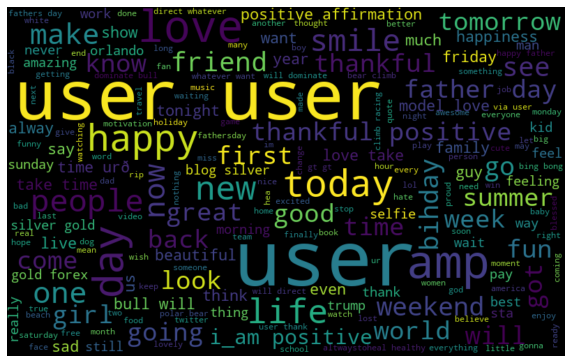

In [ ]:
# Generating Word Cloud

allWords = ' '.join([text for text in data['tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allWords)

plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

## Word Cloud of cleaned data

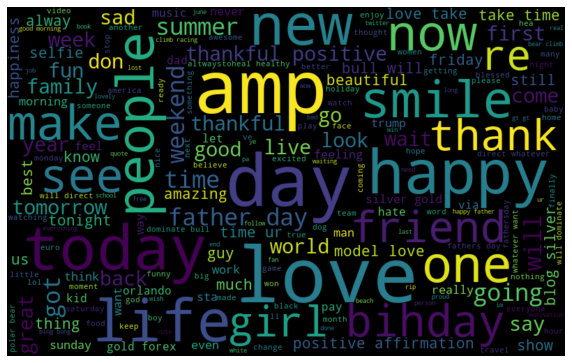

In [ ]:
# Generating Word Cloud

allWords = ' '.join([text for text in cleaned_text])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allWords)

plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

## Wordcloud after Stemming

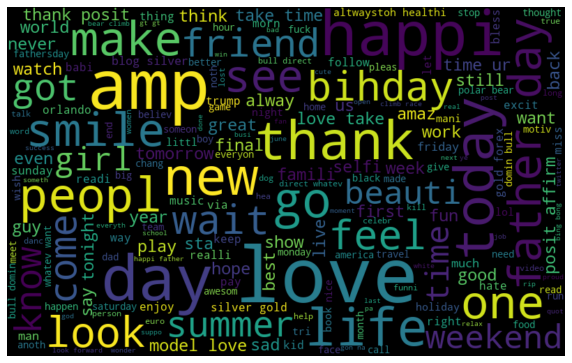

In [ ]:
# Generating Word Cloud

allWords = ' '.join([text for text in data_stemming])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allWords)

plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

# Model building

In [24]:
# Splitting into 80% Training and 20% Testing data

import sklearn.model_selection as ms
train_data, test_data = ms.train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


# Defining Parameters for the TFIDF Vectoriser and Model and then gridSearchCV for HyperParameter Tuning during training

#Linear_svm Model
params = {'tfidf__max_df': [0.9, 0.95],'tfidf__ngram_range': [(1,1), (1,2)]}

#Using Pipeline function to vectorise the tweets and then training the support vector classification machine on the vectors
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(sublinear_tf=True, stop_words='english')),
    
    # Used Multi-layer Perceptron classifier
    ("mlpC", MLPClassifier(hidden_layer_sizes=(2), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant')),])

#Using GridSearchCV for HyperParameter Tuning
gs = GridSearchCV(pipeline, params, cv=12, verbose=2, n_jobs=-1)

#Training the model on the Cleaned training data
gs.fit(train_data['cleaned_tweet'], train_data['label'])
print(gs.best_estimator_)
print(gs.best_score_)

#Predict the Labels for the cleaned test data
predicted = gs.predict(test_data['cleaned_tweet'])

sum = 0
for p, y in zip(test_data.label, predicted):
  if p == y:
    sum = sum + 1
print('Accuracy: ', sum/len(predicted)*100)

#Final Score

from sklearn.metrics import f1_score, accuracy_score

#Printing the F1 Score and the Accuracy score
print('F1 Score : ', f1_score(test_data.label, predicted))
print('Accuracy : ',  accuracy_score(test_data.label, predicted))




Fitting 12 folds for each of 4 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 28.7min finished


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.95, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_patt...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=2, learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
       